## Project Regression 

### Background: 
You are working as an analyst for a real estate company. Your company wants to build a machine learning model to predict the selling prices of houses based on a variety of features on which the value of the house is evaluated.

### Objective: 
The task is to build a model that will predict the price of a house based on features provided in the dataset. The senior management also wants to explore the characteristics of the houses using some business intelligence tool. One of those parameters include understanding which factors are responsible for higher property value - $650K and above. The questions have been provided later in the document for which you can use tableau.

### Data: 
The data set consists of information on some 22,000 properties.  The dataset consisted of historic data of houses sold between May 2014 to May 2015. These are the definitions of data points provided: (Note: For some of the variables that are self explanatory, no definition has been provided)

In [119]:
import pandas as pd
import numpy as np
import statistics

from sklearn.preprocessing import StandardScaler

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

## 1. Data Exploration 

In [120]:
data = pd.read_csv('regression_data_clean.csv')
data

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,10/13/14,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,12/9/14,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2/25/15,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,12/9/14,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2/18/15,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/14,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,6600060120,2/23/15,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,1523300141,6/23/14,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,291310100,1/16/15,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  int64  
 8   view           21597 non-null  int64  
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  int64  
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  int64  
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [122]:
# Changing type of the data column, so we can use it in the future
#'<M8[ns]' -also date time type
data['date'] = pd.to_datetime(data['date'])
data['date'].dtype

dtype('<M8[ns]')

In [123]:
#checking nul -values
nulls = pd.DataFrame(data.isna().sum()/len(data))
nulls= nulls.reset_index()
nulls.columns = ['column_name', 'Percentage Null Values']
nulls.sort_values(by='Percentage Null Values', ascending = False)

,column_name,Percentage Null Values
0,id,0.0
11,sqft_above,0.0
19,sqft_lot15,0.0
18,sqft_living15,0.0
17,long,0.0
16,lat,0.0
15,zipcode,0.0
14,yr_renovated,0.0
13,yr_built,0.0
12,sqft_basement,0.0


In [124]:
#checkung number of values - continious, discreet
data.nunique()

id               21420
date               372
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
price             3622
dtype: int64

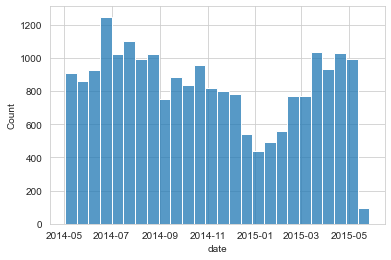

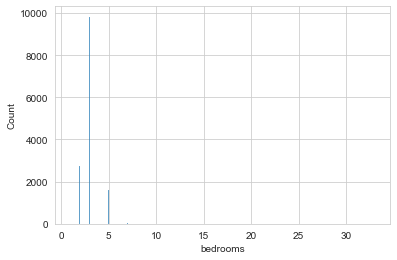

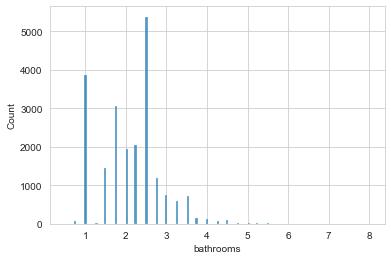

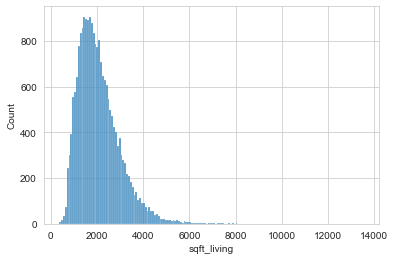

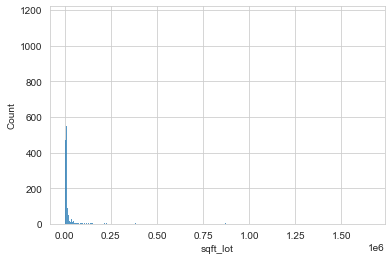

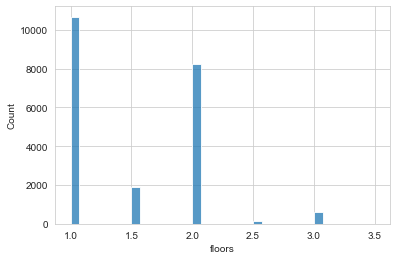

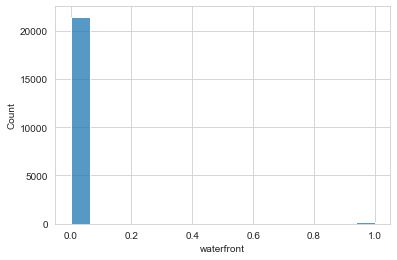

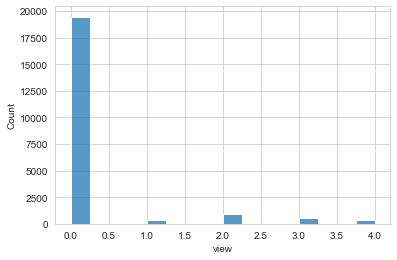

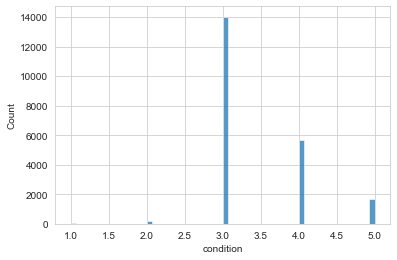

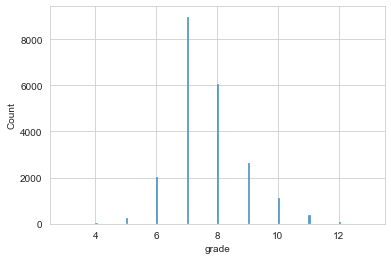

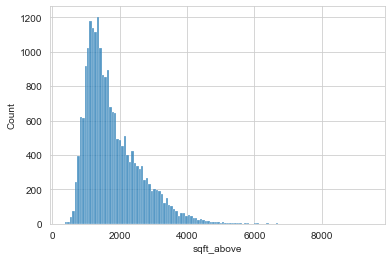

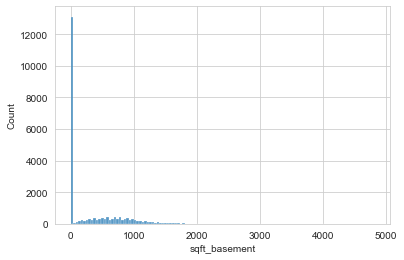

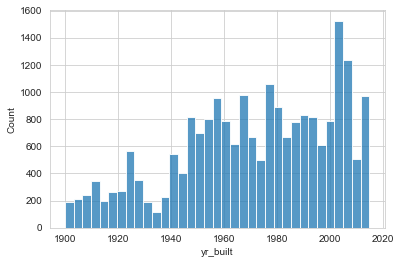

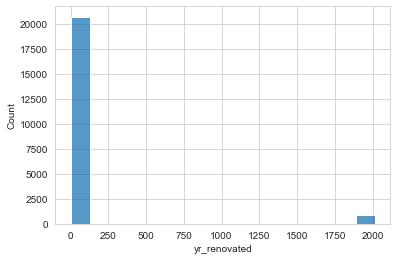

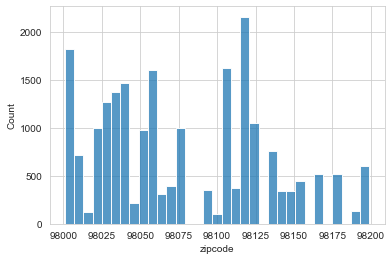

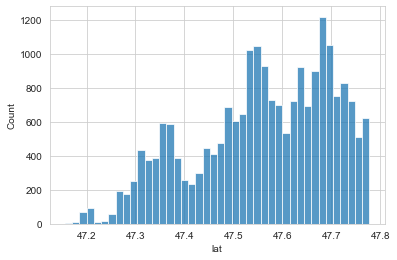

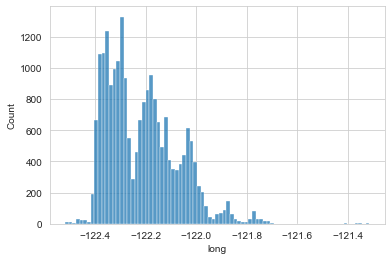

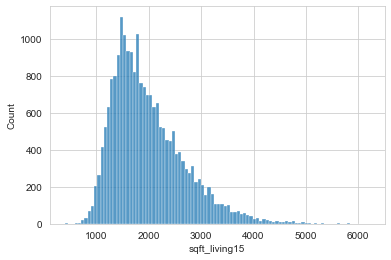

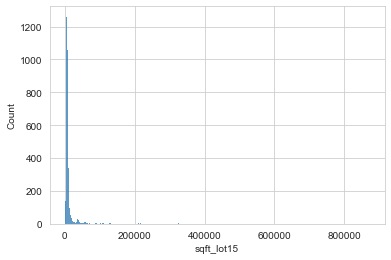

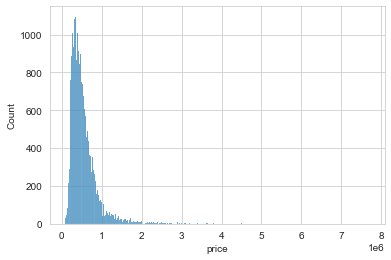

<Figure size 432x288 with 0 Axes>

In [125]:
#Plotting data distribution for all the data
for col in data.columns[1:]:
    sns.histplot(data[col])
    plt.figure()

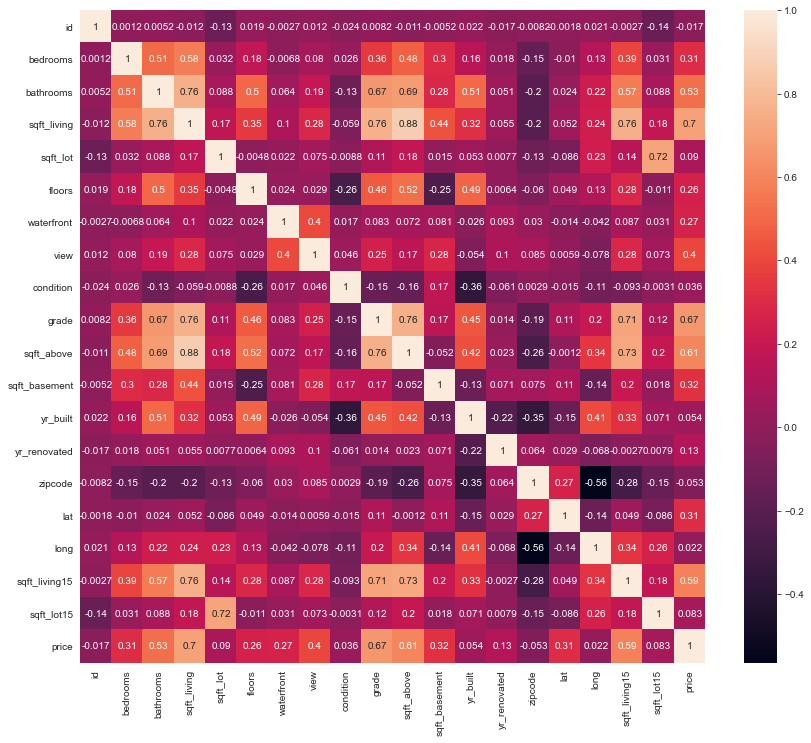

In [126]:
#correlation matric for all the data (including categorical - out of interest)
data.corr()
fig, ax = plt.subplots(figsize=(14, 12))
ax = sns.heatmap(data.corr(), annot=True)
plt.show()

In [127]:
# list of all the columns:
data.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

In [128]:
# filtering out numerical data:
data_n = data[['sqft_living', 'sqft_lot', 'sqft_above',
       'sqft_basement','sqft_living15', 'sqft_lot15', 'price']]
data_n

,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15,price
0,1180,5650,1180,0,1340,5650,221900
1,2570,7242,2170,400,1690,7639,538000
2,770,10000,770,0,2720,8062,180000
3,1960,5000,1050,910,1360,5000,604000
4,1680,8080,1680,0,1800,7503,510000
...,...,...,...,...,...,...,...
21592,1530,1131,1530,0,1530,1509,360000
21593,2310,5813,2310,0,1830,7200,400000
21594,1020,1350,1020,0,1020,2007,402101
21595,1600,2388,1600,0,1410,1287,400000


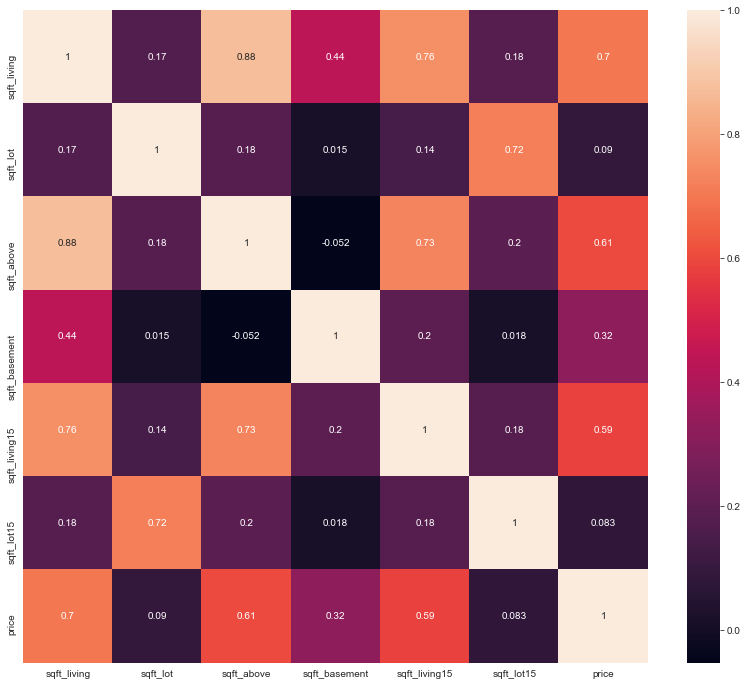

In [129]:
#correlation matrix only for numarical, to make it clear
fig, ax = plt.subplots(figsize=(14, 12))
ax = sns.heatmap(data_n.corr(), annot=True)
plt.show()

Highly correlated data that we cnapotentially drop 2 of them later later: 
sqft_above - sqft_living - sqft_living15
sqft_living os the one that has higher corelation to the target - price, 
so this would be the candidate to keep.


## 2. Raw Data - Model Check

In [130]:
#dropping id column (useless at this oint as unique) and the target 
X = data.drop(columns = ['id', 'date', 'price'], axis = 1) 
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [131]:
y = data['price']


In [132]:
#function to quickly check metrics for different models 

def model_list(X, y, l):
    '''x - dataframe features
       y - target
       l - list comtaing models we need to test 
       i.e. ['LIN', 'KNN', 'MPL', 'FOREST']    '''
   
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    
    #creating a dataframe to display result of a function
    
    result = pd.DataFrame(columns = l, index = ['MAE', 'MSE','R2', 'R2_adj', 'REL_ER'])
    
    
    # train -test split, 20%
    X_train, X_test, y_train, y_test = train_test_split \
            (X, y, test_size=0.2, random_state=42)

    #looping throuhg the list of models:
    
    for i in range(len(l)):
        if l[i] == 'KNN':
            from sklearn.neighbors import KNeighborsRegressor
            model = KNeighborsRegressor(n_neighbors = 5) 
            
        elif l[i] == 'LIN':     
            from sklearn.linear_model import LinearRegression
            model = LinearRegression()
            
        elif l[i] == 'MPL':
            from sklearn.neural_network import MLPRegressor
            model = MLPRegressor(random_state=1, max_iter=2000) #testes max_iter
            
        elif l[i] == 'FOREST':
            from  sklearn.ensemble import RandomForestRegressor
            model = RandomForestRegressor() 
            
    
            
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test) #predictions
        
        #calculationg relative error (in relation to the predicted values)
        #important as the values vary a lot: 
        
        relative_error = [] #list to store relative error
        y_t = np.array(y_test) #converting y_test to array to compare with predictions
        
        for j in range(len(y_pred)):
            relative_error.append(abs(y_t[j] - y_pred[j])/y_t[j])
        
        # average of the relative error: 
        rel_e = statistics.mean(relative_error)
        
        
        #dataframe of the results: 
        result[l[i]][0] = mean_absolute_error(y_t,y_pred) #MAE
        result[l[i]][1] = mean_squared_error(y_t,y_pred) #MSE
        result[l[i]][2] = r2_score(y_t,y_pred) # R2
        result[l[i]][3] =  1 - (1-r2_score(y_t, y_pred))* \
        (len(y_t)-1)/(len(y_t)-X_test.shape[1]-1) #R2 adj
        result[l[i]][4] = rel_e # relative error
        
    return result 
    
   

In [133]:
#testing linear regression and random forest: 
l = ['LIN', 'FOREST']
test = model_list(X, y, l)
test

,LIN,FOREST
MAE,125740,68314.8
MSE,4.01827e+10,1.53575e+10
R2,0.691416,0.882061
R2_adj,0.690124,0.881568
REL_ER,0.258916,0.129725


Random forest works already but we will improve linear model further: 

## 3. Feature Engineering 

## 3.1. Categorical

In [134]:
data.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,4.580474e+09,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,5.402966e+05
std,2.876736e+09,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950,3.673681e+05
min,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,2.123049e+09,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05
50%,3.904930e+09,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05
75%,7.308900e+09,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


Looking ar categorical features in order to address them:

### 1. index 
id is not unique - checking for duplicates

In [135]:
data_1 = data.copy() #copy of the dataset

In [136]:
#dropping duplicate rows if any
data.drop_duplicates()
data.shape

(21597, 21)

In [137]:
#checking if there are any id duplicates
data['id'].nunique()

21420

In [138]:
#checking how duplicates look 
data_d = data[data.duplicated(['id'], keep = False)].sort_values(by = ['id'])
data_d

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
2495,1000102,2015-04-22,6,3.00,2400,9373,2.0,0,0,3,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316,300000
2494,1000102,2014-09-16,6,3.00,2400,9373,2.0,0,0,3,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316,280000
16800,7200179,2014-10-16,2,1.00,840,12750,1.0,0,0,3,6,840,0,1925,0,98055,47.4840,-122.211,1480,6969,150000
16801,7200179,2015-04-24,2,1.00,840,12750,1.0,0,0,3,6,840,0,1925,0,98055,47.4840,-122.211,1480,6969,175000
11422,109200390,2014-10-20,3,1.75,1480,3900,1.0,0,0,4,7,1480,0,1980,0,98023,47.2977,-122.367,1830,6956,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6339,9828200460,2014-06-27,2,1.00,700,4800,1.0,0,0,3,7,700,0,1922,0,98122,47.6147,-122.300,1440,4800,260000
15186,9834200305,2015-02-10,3,1.00,1790,3876,1.5,0,0,5,7,1090,700,1904,0,98144,47.5750,-122.288,1360,4080,615000
15185,9834200305,2014-07-16,3,1.00,1790,3876,1.5,0,0,5,7,1090,700,1904,0,98144,47.5750,-122.288,1360,4080,350000
1084,9834200885,2014-07-17,4,2.50,2080,4080,1.0,0,0,5,7,1040,1040,1962,0,98144,47.5720,-122.290,1340,4080,360000


In [139]:
#We see that several houses where purchased several times during the period in te dataset
#Keeping only the most recent price of purchase

data = data.sort_values('date').drop_duplicates('id',keep = 'last')
data

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
7316,2202500290,2014-05-02,4,1.00,1450,8800,1.0,0,0,4,7,1450,0,1954,0,98006,47.5746,-122.135,1260,8942,435000
20586,7853361370,2014-05-02,4,2.50,3310,6500,2.0,0,0,3,8,3310,0,2012,0,98065,47.5150,-121.870,2380,5000,555000
1040,7197300105,2014-05-02,4,2.50,1940,10500,1.0,0,0,4,7,1140,800,1976,0,98052,47.6830,-122.114,2200,10500,550000
20543,3438501320,2014-05-02,2,2.50,1630,1368,2.0,0,0,3,7,1280,350,2009,0,98106,47.5489,-122.363,1590,2306,295000
9587,472000620,2014-05-02,3,2.50,2600,4750,1.0,0,0,4,9,1700,900,1951,0,98117,47.6833,-122.400,2380,4750,790000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19381,8149600265,2015-05-14,4,1.75,1980,5850,1.0,0,1,4,8,1380,600,1960,0,98116,47.5607,-122.391,1810,5850,725000
12623,4166600610,2015-05-14,3,2.00,1410,44866,1.0,0,0,4,7,1410,0,1985,0,98023,47.3273,-122.370,2950,29152,335000
5632,7923600250,2015-05-15,5,2.00,1870,7344,1.5,0,0,3,7,1870,0,1960,0,98007,47.5951,-122.144,1870,7650,450000
13040,5101400871,2015-05-24,2,1.75,1390,6670,1.0,0,0,3,6,720,670,1941,0,98115,47.6914,-122.308,920,6380,445500


In [140]:
#resorting the data back via index
data = data.sort_index().reset_index().drop('index', axis = 1)
data.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [141]:
#saving index in a i in case we need to use it and dropping it for now: 
i = data['id']
data = data.drop('id', axis = 1)

In [142]:
data

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21415,2014-05-21,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21416,2015-02-23,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21417,2014-06-23,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21418,2015-01-16,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


### 2. date

In [143]:
#Cheking the length of the period to see wheather it makes sense to keep it.
print(min(data['date']))
print(max(data['date']))

2014-05-02 00:00:00
2015-05-27 00:00:00


period is one year only, so we will drop the date column
as we wouldn't expect big price fluctuations within one tear for it to have significance

In [144]:
data = data.drop(columns = 'date')
data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [145]:
#Checking in with the model metrics
X = data.drop(['price'], axis = 1) 
y = data['price']
l = ['LIN']
test = model_list(X, y, l)
test

,LIN
MAE,123194
MSE,3.47269e+10
R2,0.712456
R2_adj,0.711242
REL_ER,0.255488


### 3. bedrooms

In [146]:
#checking possible options for amount of bedrooms:
data['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10, 33])

In [147]:
# 33 bedrooms seems odd, but might be a castle.
#checking whether there are actually 33 bedrooms:
data.loc[data['bedrooms'] == 33]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
15710,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700,640000


considring sqft and price - this is likely a typo or mistake

since it's only one record - we can drop it 

In [148]:
data = data[data['bedrooms'] != 33].reset_index().drop('index', axis = 1)

In [149]:
data['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10])

In [150]:
#checking the amount of houses with different bedroom count: 
data['bedrooms'].value_counts().sort_index()

1      191
2     2736
3     9731
4     6849
5     1586
6      265
7       38
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

there is apotential to group the bedrooms, but it does not omprove the model, 
so we will not do it for now 

In [151]:
#data['bedrooms'] = np.where(data['bedrooms']>5, 5, data['bedrooms'])
#data['bedrooms'].value_counts().sort_index()


In [152]:
X = data.drop(['price'], axis = 1) 
y = data['price']
l = ['LIN']
test = model_list(X, y, l)
test

,LIN
MAE,124974
MSE,3.58966e+10
R2,0.708202
R2_adj,0.70697
REL_ER,0.257602


The feature is categorical ordinal

### 4. bathrooms

#### Property: 
bathrooms tend to come in decimal points: There's the 1.25 bath (a full bathroom, plus a second bathroom comprised of a toilet only), 1.5 bath (the second bathroom has only toilet and sink, a combo frequently referred to as a 'powder room'), 1.75 (shower stall but no tub in the second bathroom)


In [153]:
#same exersise with bathrooms:
data['bathrooms'].value_counts(dropna = False).sort_index()

0.50       4
0.75      70
1.00    3794
1.25       9
1.50    1429
1.75    3019
2.00    1913
2.25    2031
2.50    5352
2.75    1182
3.00     747
3.25     586
3.50     729
3.75     155
4.00     134
4.25      79
4.50      99
4.75      23
5.00      21
5.25      13
5.50      10
5.75       4
6.00       6
6.25       2
6.50       2
6.75       2
7.50       1
7.75       1
8.00       2
Name: bathrooms, dtype: int64

In [154]:
#checking whether 0.75 bathrooms make sense:
data[['bathrooms', 'price']].loc[data['bathrooms'] <1].sort_values(by = 'price')

,bathrooms,price
460,0.75,80000
3769,0.75,95000
16177,0.75,100000
10322,0.50,109000
18329,0.75,115000
...,...,...
1468,0.75,530000
18807,0.75,550000
2654,0.75,562100
19014,0.75,699999


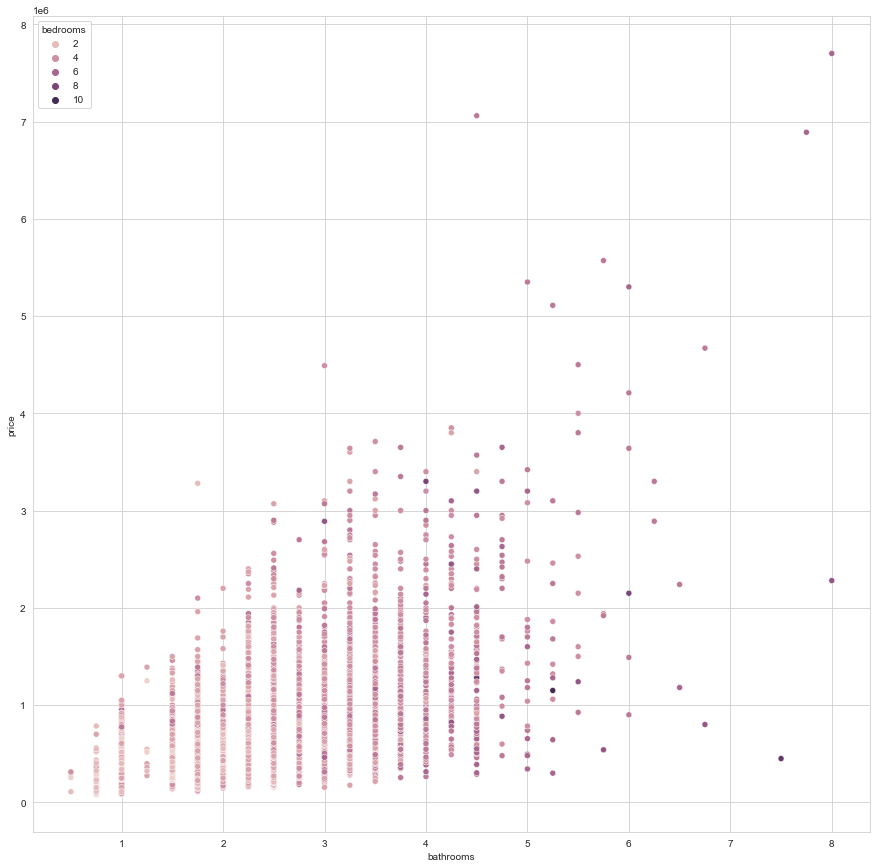

In [155]:
#plotting the bathroom - price - bedrooms scatter plot 
plt.figure(figsize = (15,15))
sns.scatterplot(x = data['bathrooms'],  y = data['price'], hue = data['bedrooms'])

In [156]:
#checking how 6+ bathroom houses look like and whether they make sense:
data[['bathrooms', 'bedrooms', 'sqft_living', 'price']].loc[data['bathrooms'] > 6 ].sort_values(by = 'price')

,bathrooms,bedrooms,sqft_living,price
8469,7.50,9,4050,450000
3986,6.75,7,7480,800000
20388,6.50,6,6260,1180000
21313,6.50,5,7270,2240000
12651,8.00,7,13540,2280000
14413,6.25,5,8670,2890000
18124,6.25,5,8020,3300000
8023,6.75,5,9640,4670000
9170,7.75,6,9890,6890000
7187,8.00,6,12050,7700000


In [157]:
#Binning bathrooms did not inprove the metrics, so keeping as is 

In [158]:
X = data.drop(['price'], axis = 1) 
y = data['price']
l = ['LIN', 'FOREST']
test = model_list(X, y, l)
test

,LIN,FOREST
MAE,124974,68776
MSE,3.58966e+10,1.51876e+10
R2,0.708202,0.876543
R2_adj,0.70697,0.876022
REL_ER,0.257602,0.130435


### 5. yr_built	

Tried changing year built to: - how long ago was built, considering database is from 2015
Did not improve results

In [159]:
#data['yr_built']

In [160]:
#data['yr_built'] = data['yr_built'].apply(lambda x: 2015-x)
#data.head()

In [161]:
#data.rename(columns = {'yr_built':'house_age'}, inplace=True)
#data.head()

In [162]:
#X = data.drop(['price'], axis = 1) 
#y = data['price']
#l = ['LIN', 'FOREST']
#test = model_list(X, y, l)
#test

### 6. yr_renovated


Tried change yr renovated to how long ago was renovated - the results were worse

In [163]:
#keeping as is fro now
#data['yr_renovated'] = data['yr_renovated'].apply(lambda x: (2015 - x) if (x != 0) else x)

In [164]:
#data['yr_renovated'].value_counts()

### 7. lat, long

### 7.1. lon, lat - distance

Location of the house clearly affects the price. 
Consider commute to work, schools, shops, parks etc.
We will try to see whether distance to biggest area centers - Seattle and Belleview affect the model. 

In [165]:
#creating a column with the coordinates: 
data['coordinates'] = tuple(zip(round(data.lat, 6), round(data.long, 6)))
data['coordinates']

0        (47.5112, -122.257)
1         (47.721, -122.319)
2        (47.7379, -122.233)
3        (47.5208, -122.393)
4        (47.6168, -122.045)
                ...         
21414    (47.6993, -122.346)
21415    (47.5107, -122.362)
21416    (47.5944, -122.299)
21417    (47.5345, -122.069)
21418    (47.5941, -122.299)
Name: coordinates, Length: 21419, dtype: object

In [166]:
#pip install haversine

In [167]:
#function to calculate distances: 
from haversine import haversine

In [168]:
#testing function :
lyon = (45.7597, 4.8422) # (lat, lon)
paris = (48.8567, 2.3508)

haversine(lyon, paris)
 # in kilometers

392.2172595594006

In [169]:
#function to calculate the disance for a column:
def distance(x,y):
    z = []
    for i in y.index:
        z.append(haversine((x),(y[i])))
    
    return z

In [170]:
# saving coordinates of seattle and bellevi
seattle = [47.608013, -122.335167]
bellevue = [47.610378, -122.200676]

In [171]:
#creating a column to save the distances in the datafram
data['seattle'] = distance(seattle, data['coordinates'])
data['bellevue'] = distance(bellevue, data['coordinates'])

In [172]:
X = data.drop(['price', 'coordinates'], axis = 1) 
y = data['price']
l = ['LIN', 'FOREST']
test = model_list(X, y, l)
test

,LIN,FOREST
MAE,118819,67422.5
MSE,3.15051e+10,1.38587e+10
R2,0.7439,0.887344
R2_adj,0.742698,0.886816
REL_ER,0.257289,0.12867


R2 (+3% - LIN)
Previuos:
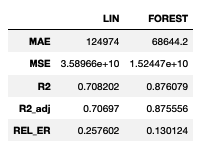

In [173]:
data_2 = data.copy

Was trying the replace distance to cities with one column - distance to clisest city, but the model does not work as great

In [174]:
#data['distance_to_city'] = data[['seattle', 'bellevue']].min(axis = 1)
#data.head()

In [175]:
#dropping coordinates

data = data.drop(columns = ['coordinates'], axis = 1)
data.shape

(21419, 21)

In [176]:
#data = data.drop(columns = ['seattle', 'bellevue'], axis = 1)

### 7.2. lon, lat - clustering

when exloring the data on the actlula map we saw that zipcode is nor enoygh to identify the price of the house. 
we will try clustering houses that re close together and see whether it will affect the model.

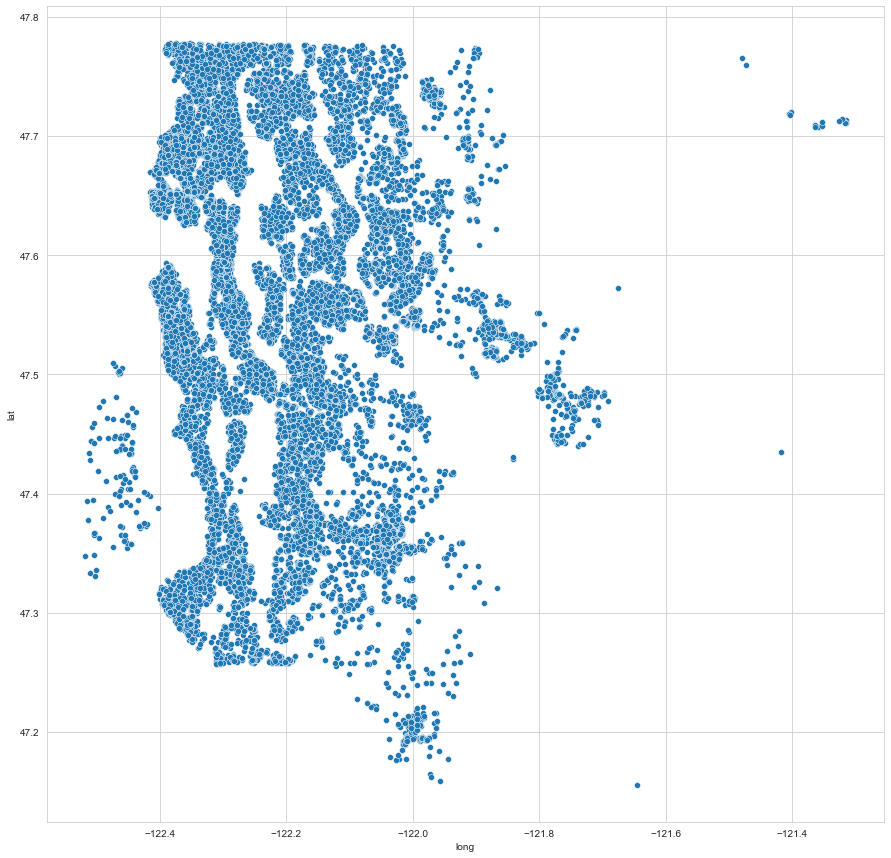

In [177]:
#plotting the houses locations:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (15,15))
sns.scatterplot(data['long'], data['lat'])

In [178]:
from sklearn.cluster import AgglomerativeClustering

# creates 25 clusters based on the distance between houses, 
# using uneven clustering

# tested several amounts of clusters - 30 seems to work well
agc = AgglomerativeClustering(n_clusters = 30, affinity='euclidean', linkage='ward')
data['geo_cluster'] = agc.fit_predict(data[['lat','long']])

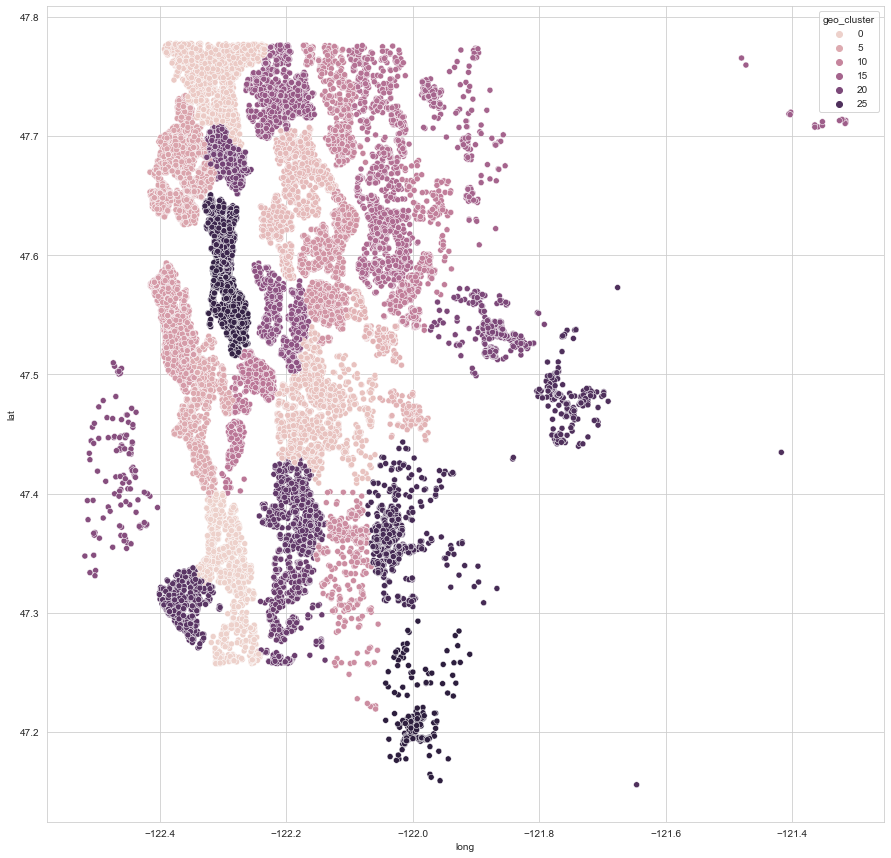

In [179]:
#plotting clusters distribution
plt.figure(figsize = (15,15))
sns.scatterplot(data['long'], data['lat'], hue = data['geo_cluster'])

In [180]:
#dummifying the column with the clusters
data_dum_g = pd.get_dummies(data['geo_cluster'], drop_first = True)
data = pd.concat([data, data_dum_g], axis = 1).drop(columns = ['geo_cluster'], axis = 1)

In [181]:
X = data.drop(['price'], axis = 1) 
y = data['price']
l = ['LIN', 'FOREST']
test = model_list(X, y, l)
test

,LIN,FOREST
MAE,106753,67382.7
MSE,2.60453e+10,1.39128e+10
R2,0.788282,0.886905
R2_adj,0.785831,0.885596
REL_ER,0.226738,0.128901


Improves R2 4%, and errors
#### Previous: 
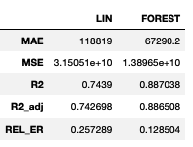

### 8. zip code

### 8.1. Zip code - dummifying

In [182]:
data_3 = data.copy()

trials to bin zipcodes did not improve results, so we will dummify the column

In [183]:
#dummifying zip

data_dum = pd.get_dummies(data['zipcode'], drop_first = True)
data = pd.concat([data, data_dum], axis = 1).drop(columns = ['zipcode'], axis = 1)
data_dum.shape

(21419, 69)

In [184]:
X = data.drop(['price'], axis = 1) 
y = data['price']
l = ['LIN', 'FOREST']
test = model_list(X, y, l)
test

,LIN,FOREST
MAE,95850.5,67383.2
MSE,2.19073e+10,1.41071e+10
R2,0.821919,0.885326
R2_adj,0.816918,0.882105
REL_ER,0.201558,0.128568


Significant improvement of all metrics
#### Previous: 
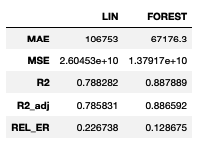

### 8.2. zipcode - town clustering

as an alternative - lookig at clustering zipcodes by nearby towns 

In [185]:
#pip install uszipcode

In [186]:
from uszipcode import Zipcode,SearchEngine

In [187]:
#function to extract city name from location 
def city_name(x):
    search = SearchEngine(simple_zipcode=True)
    zipcode=search.by_zipcode(x)
    return zipcode.major_city
    

In [188]:
#testing data before dummification of the zipcode - as an alternative 
data = data_3
data['city'] = list(map(city_name, data["zipcode"]))

In [189]:
data['city'].unique()

array(['Seattle', 'Kenmore', 'Sammamish', 'Redmond', 'Federal Way',
       'Maple Valley', 'Bellevue', 'Duvall', 'Auburn', 'Mercer Island',
       'Kent', 'Issaquah', 'Renton', 'Vashon', 'Kirkland',
       'Black Diamond', 'North Bend', 'Woodinville', 'Snoqualmie',
       'Enumclaw', 'Fall City', 'Bothell', 'Carnation', 'Medina'],
      dtype=object)

In [190]:
#dummifying the columns
data_dum = pd.get_dummies(data['city'], drop_first = True)
data = pd.concat([data, data_dum], axis = 1).drop(columns = ['city'], axis = 1)
data_dum.shape

(21419, 23)

In [191]:
X = data.drop(['price'], axis = 1) 
y = data['price']
l = ['LIN', 'FOREST']
test = model_list(X, y, l)
test

,LIN,FOREST
MAE,101562,67735
MSE,2.42237e+10,1.42613e+10
R2,0.80309,0.884072
R2_adj,0.799723,0.88209
REL_ER,0.213929,0.128966


Model performs worse, so we will keep the dimmification of zipcodes option 

### 9. grade

Testing what dummifying grade would do:

In [192]:
data_dum_2 = pd.get_dummies(data['grade'], drop_first = True)
data = pd.concat([data, data_dum_2], axis = 1).drop(columns = ['grade'], axis = 1)

In [193]:
X = data.drop(['price'], axis = 1) 
y = data['price']
l = ['LIN', 'FOREST']
test = model_list(X, y, l)
test


,LIN,FOREST
MAE,94096.9,67364.4
MSE,2.26005e+10,1.39756e+10
R2,0.816284,0.886395
R2_adj,0.812743,0.884205
REL_ER,0.188396,0.128779


R2 +2% on LINEAR, reduction od relative  error and MAE - keeping
#### Previous: 
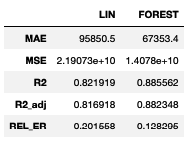

In [194]:
#checking the amount of columns now
data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,seattle,bellevue,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,Bellevue,Black Diamond,Bothell,Carnation,Duvall,Enumclaw,Fall City,Federal Way,Issaquah,Kenmore,Kent,Kirkland,Maple Valley,Medina,Mercer Island,North Bend,Redmond,Renton,Sammamish,Seattle,Snoqualmie,Vashon,Woodinville,4,5,6,7,8,9,10,11,12,13
0,3,1.00,1180,5650,1.0,0,0,3,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900,12.259326,11.810190,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,3,2.25,2570,7242,2.0,0,0,3,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000,12.621798,15.159712,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,1.00,770,10000,1.0,0,0,3,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000,16.343566,14.384873,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,4,3.00,1960,5000,1.0,0,0,5,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000,10.624186,17.533739,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,3,2.00,1680,8080,1.0,0,0,3,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000,21.773224,11.691242,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


### 9. view

Testing what dummifying view would do:

In [195]:
data['view'].unique()

array([0, 3, 4, 2, 1])

In [196]:
#TEST - DUMMIFYING >> VIEW
#data_dum_3 = pd.get_dummies(data['view'], drop_first = True)
#data_test_2 = pd.concat([data_test, data_dum_3], axis = 1).drop(columns = ['view'], axis = 1)

#X = data_test_2.drop(['price'], axis = 1) 
#y = data_test_2['price']
#l = ['LIN']
#test = model_list(X, y, l)
#test

Almost no impact, so we won't keep that in the  model

### 10. bedrooms

testing what dummifying view would do:

In [197]:
#data_dum_4 = pd.get_dummies(data['bedrooms'], drop_first = True)
#data_test_3 = pd.concat([data_test_2, data_dum_4], axis = 1).drop(columns = ['bedrooms'], axis = 1)

#X = data_test_3.drop(['price'], axis = 1) 
#y = data_test_3['price']
#l = ['LIN']
#test = model_list(X, y, l)
#test

Almost no impact, so we won't keep that in the  model

## 3.2. Numerical Data

In [198]:
data_4 = data.copy

In [199]:
#extracting only numerical data: - previously saved data_n
data_n.columns

Index(['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

In [211]:
data_n.describe()

,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15,price
count,21419.000000,2.141900e+04,21419.000000,21419.000000,21419.000000,21419.000000,2.141900e+04
mean,2083.154256,1.512846e+04,1791.205285,291.948971,1988.414819,12776.095196,5.418568e+05
std,918.824411,4.153172e+04,828.696414,442.881467,685.538299,27346.204562,3.675649e+05
min,370.000000,5.200000e+02,370.000000,0.000000,399.000000,651.000000,7.800000e+04
25%,1430.000000,5.040000e+03,1200.000000,0.000000,1490.000000,5100.000000,3.249500e+05
50%,1920.000000,7.614000e+03,1560.000000,0.000000,1840.000000,7620.000000,4.505000e+05
75%,2550.000000,1.069200e+04,2220.000000,560.000000,2370.000000,10086.500000,6.450000e+05
max,13540.000000,1.651359e+06,9410.000000,4820.000000,6210.000000,871200.000000,7.700000e+06


In [200]:
#saving new data_n based on the most recent dataframe
data_n = data[data_n.columns]
data_n.head()

,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15,price
0,1180,5650,1180,0,1340,5650,221900
1,2570,7242,2170,400,1690,7639,538000
2,770,10000,770,0,2720,8062,180000
3,1960,5000,1050,910,1360,5000,604000
4,1680,8080,1680,0,1800,7503,510000


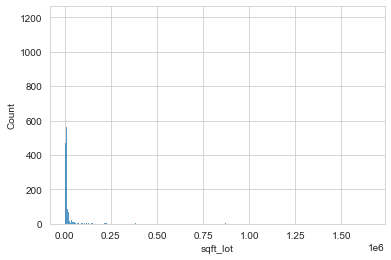

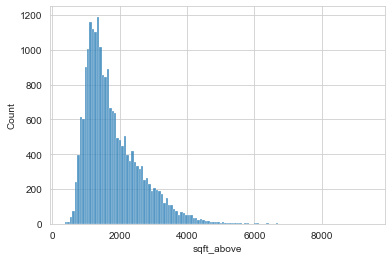

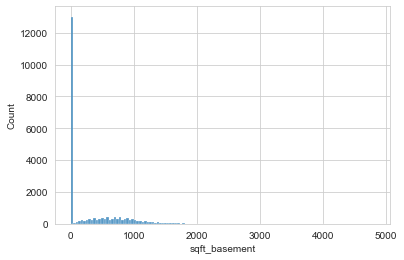

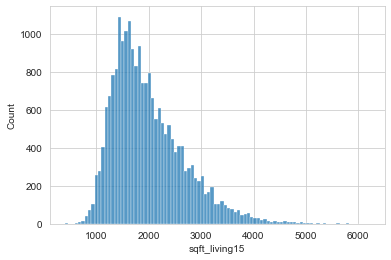

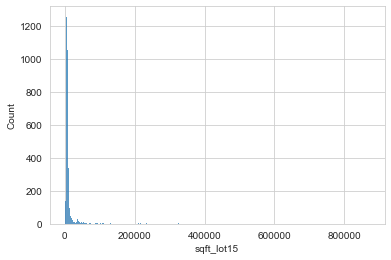

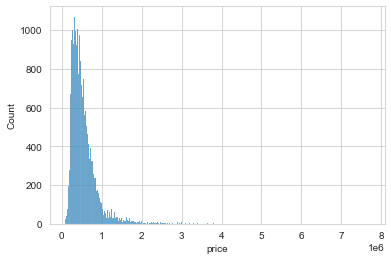

<Figure size 432x288 with 0 Axes>

In [201]:
#plotting distribution
for col in data_n.columns[1:]:
    sns.histplot(data[col])
    plt.figure()

Numerical feature and target are highly skewed - wil will tray log transformation 

### 1. price - log transformation

In [202]:
#data = data_4
#data['price']

In [203]:
#function for transformation (in case any 0 values left)
def log_transfom(x):
    if np.isfinite(x) and x!=0: # If the value is finite and != 0...
        return np.log(x)
    else:
        return np.NAN

In [204]:
data_log = data
data_log['price'] = data['price'].apply(log_transfom)
data_log['price']

0        12.309982
1        13.195614
2        12.100712
3        13.311329
4        13.142166
           ...    
21414    12.793859
21415    12.899220
21416    12.904459
21417    12.899220
21418    12.691580
Name: price, Length: 21419, dtype: float64

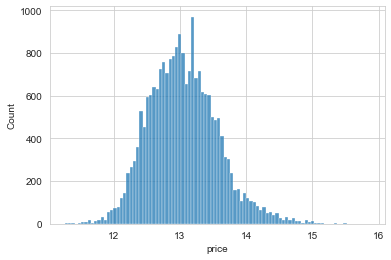

In [205]:
#Checking distribution:
sns.histplot(data_log['price'])

Much better distribution - checking the model 

In [206]:
#adjusting the function to transform lof back through exp prior calculating metrics
#see line 41-42

def model_list_log(X, y, l):
    '''when target transformed to log
       x - dataframe features
       y - target
       l - list comtaing models we need to test 
       i.e. ['LIN', 'KNN', 'MPL' ]    '''
   
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    
    #creating a dataframe to display result of a function
    
    result = pd.DataFrame(columns = l, index = ['MAE', 'MSE','R2', 'R2_adj','REL_ER'])
    
    X_train, X_test, y_train, y_test = train_test_split \
            (X, y, test_size=0.2, random_state=42)

    for i in range(len(l)):
        if l[i] == 'KNN':
            from sklearn.neighbors import KNeighborsRegressor
            model = KNeighborsRegressor(n_neighbors = 5)
            
        elif l[i] == 'LIN':     
            from sklearn.linear_model import LinearRegression
            model = LinearRegression()
            
        elif l[i] == 'MPL':
            from sklearn.neural_network import MLPRegressor
            model = MLPRegressor(random_state=1, max_iter=2000) #testes max_iter
            
        elif l[i] == 'FOREST':
            from  sklearn.ensemble import RandomForestRegressor
            model = RandomForestRegressor() 
            
            
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        y_t = np.exp(np.array(y_test))
        y_pred = np.exp(y_pred)
       
    
        relative_error = []
        
        for j in range(len(y_pred)):
            relative_error.append(abs(y_t[j] - y_pred[j])/y_t[j])
            
        rel_e = statistics.mean(relative_error)
        
        result[l[i]][0] = mean_absolute_error(y_t,y_pred) #MAE
        result[l[i]][1] = mean_squared_error(y_t,y_pred) #MSE
        result[l[i]][2] = r2_score(y_t,y_pred) # R2
        result[l[i]][3] =  1 - (1-r2_score(y_t, y_pred))* \
        (len(y_t)-1)/(len(y_t)-X_test.shape[1]-1) #R2 adj
        result[l[i]][4] = rel_e
        
        
    return result 

In [207]:
X = data_log.drop(['price'], axis = 1) 
y = data_log['price']
l = ['LIN', 'FOREST']
test = model_list_log(X, y, l)
test

,LIN,FOREST
MAE,79518.9,67169.9
MSE,1.7764e+10,1.45065e+10
R2,0.855599,0.882079
R2_adj,0.852816,0.879806
REL_ER,0.148293,0.125085


Significant improvement to the R2 and Relatve error
#### Previous:

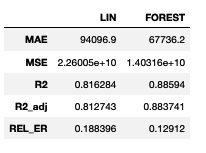

### 2. Outliers 

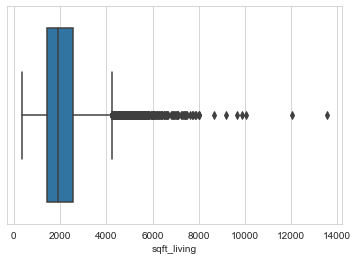

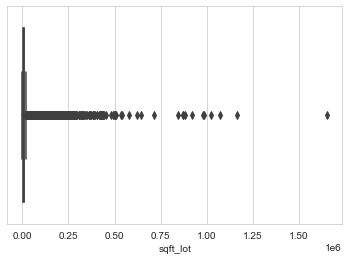

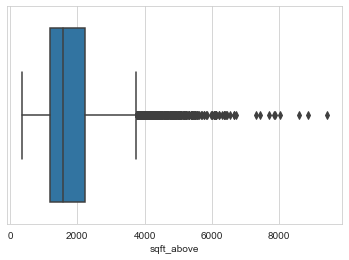

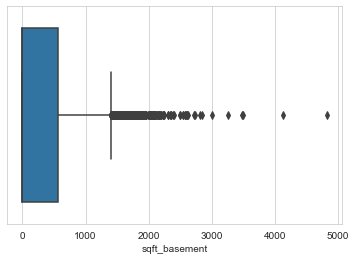

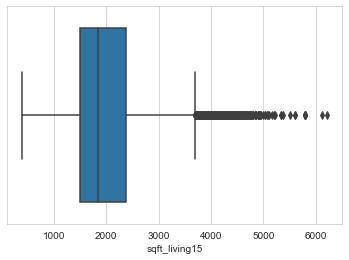

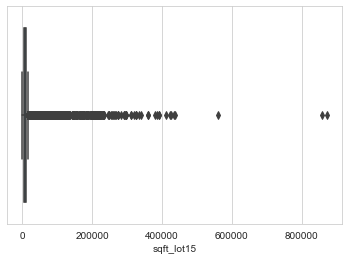

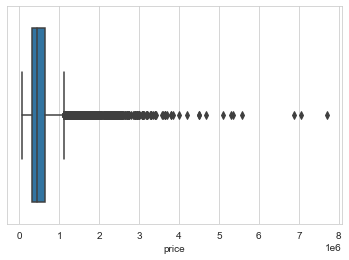

In [212]:
for i in data_n.columns:
    sns.boxplot(data_n[i])
    plt.show()

In [214]:
# function to calculate the number of outliers: 
# input-dataframe with numerical columns that you want to check

def calc_outliers(data):

    #list with all the column names
    cols = data.columns

    for i in range(len(cols)):
        Q1 = np.quantile(data[cols[i]],0.25)
        Q3 = np.quantile(data[cols[i]],0.75)
        out_border_high = Q3+1.5*(Q3-Q1)
        out_border_low = Q1-1.5*(Q3-Q1)
        
        out_index = data[(data[cols[i]] < out_border_low) | (data[cols[i]] > out_border_high)].index
        
        print("Number of outliers for", cols[i],':', len(out_index))
    
    return 

In [215]:
#checking all numerical data to quantity of outliers 
print('total data:', len(data_n))
calc_outliers(data_n)

total data: 21419
Number of outliers for sqft_living : 568
Number of outliers for sqft_lot : 2405
Number of outliers for sqft_above : 600
Number of outliers for sqft_basement : 493
Number of outliers for sqft_living15 : 503
Number of outliers for sqft_lot15 : 2174
Number of outliers for price : 1152


Percentage oy outliers is quite significant - it is real data for very expensive housing, rather then mistakes, so for now we will keep them in. 

### 3. sqf - log transformation

In [216]:
data_5 = data_log

Log transformation to the other skewed data: 

In [217]:
data_log2 = data_log
data_log2['sqft_above'] = data['sqft_above'].apply(log_transfom)
data_log2['sqft_living'] = data['sqft_above'].apply(log_transfom)
data_log2['sqft_living15'] = data['sqft_living15'].apply(log_transfom)

In [219]:
X = data_log2.drop(['price'], axis = 1) 
y = data_log2['price']
l = ['LIN', 'FOREST']
test = model_list_log(X, y, l)
test

,LIN,FOREST
MAE,77382.3,68302.3
MSE,1.63495e+10,1.55951e+10
R2,0.867097,0.87323
R2_adj,0.864535,0.870786
REL_ER,0.145452,0.126914


#### Previuos: 
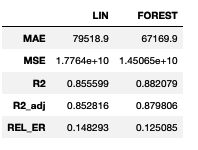

Other transformation like MinMaxSaler or Standard Scaler did not give great results. 

We will stop our model tweaaking at this point.
Random forest model did not change and will be subkect to further studies and exploration
#### Overall improvements: 
#### Raw data:
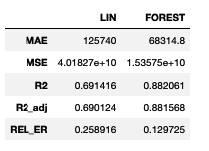

#### Final data:
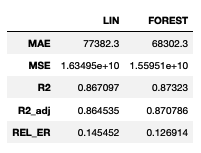

### The end :)